#**Breast Cancer Detection**

#**Introduction**

The Breast Cancer Wisconsin (Diagnostic) Data Set is a popular dataset commonly used for machine learning and data analysis tasks. It was originally obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg. The dataset is publicly available and widely used in research and education.

**About Dataset**

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29


**Columns description:**

1. ID: An identifier for each sample or patient.
2. Diagnosis: Indicates whether the breast mass is classified as malignant (M) or benign (B).
3. radius_mean: Mean radius of the breast mass.
4. texture_mean: Mean texture (standard deviation of gray-scale values) of the breast mass.
5. perimeter_mean: Mean perimeter of the breast mass.
6. area_mean: Mean area of the breast mass.
7. smoothness_mean: Mean smoothness (local variation in radius lengths) of the breast mass.
8. compactness_mean: Mean compactness (perimeter^2 / area - 1.0) of the breast mass.
9. concavity_mean: Mean concavity (severity of concave portions of the contour) of the breast mass.
10. concave points_mean: Mean number of concave portions of the contour of the breast mass.
11. symmetry_mean: Mean symmetry of the breast mass.
12. fractal_dimension_mean: Mean fractal dimension ("coastline approximation" - 1) of the breast mass.
13. radius_se: Standard error of the radius of the breast mass.
14. texture_se: Standard error of the texture (standard deviation of gray-scale values) of the breast mass.
15. perimeter_se: Standard error of the perimeter of the breast mass.
area_se: Standard error of the area of the breast mass.
16. smoothness_se: Standard error of the smoothness (local variation in radius lengths) of the breast mass.
17. compactness_se: Standard error of the compactness (perimeter^2 / area - 1.0) of the breast mass.
18. concavity_se: Standard error of the concavity (severity of concave portions of the contour) of the breast mass.
19. concave points_se: Standard error of the number of concave portions of the contour of the breast mass.
20. symmetry_se: Standard error of the symmetry of the breast mass.
fractal_dimension_se: Standard error of the fractal dimension ("coastline approximation" - 1) of the breast mass.
21. radius_worst: Worst (mean of the three largest values) radius of the breast mass.
22. texture_worst: Worst texture (standard deviation of gray-scale values) of the breast mass.
23. perimeter_worst: Worst perimeter of the breast mass.
24. area_worst: Worst area of the breast mass.
25. smoothness_worst: Worst smoothness (local variation in radius lengths) of the breast mass.
26. compactness_worst: Worst compactness (perimeter^2 / area - 1.0) of the breast mass.
27. concavity_worst: Worst concavity (severity of concave portions of the contour) of the breast mass.
28. concave points_worst: Worst number of concave portions of the contour of the breast mass.
29. symmetry_worst: Worst symmetry of the breast mass.
fractal_dimension_worst: Worst fractal dimension ("coastline approximation" - 1) of the breast mass.,etc


#**Problem Statement**

The goal is to develop models that can accurately predict whether a breast mass is malignant or benign based on its characteristics, which can assist in diagnosis and treatment planning.

**Malignant:** It means the mass is cancerous. Cancer cells can spread and cause serious health issues if not treated.

**Benign:** It means the mass is not cancerous. While it might still need attention, it's usually not as serious as cancer and doesn't spread to other parts of the body.


**Importing the necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Load the Dataset**

In [2]:
df = pd.read_csv("/content/data.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Data Assessing**

In [5]:
df.shape

(569, 33)

**we have 569 rows and 33 columns**

In [10]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

1. in 32 columns we can see Unnamed: 32 we will remove while cleaning the data
2. only 1 categorical data is present rest is numerical variable

In [8]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [9]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


**we can see that some of them has outliers**

In [19]:
#removing the "Unnamed: 32" columns
df.drop("Unnamed: 32",axis=1,inplace=True)

In [20]:
#checking the duplicate values
df['id'].duplicated().sum()

0

**we dont have duplicate values**

In [21]:
#checking for missing values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**no missing values either**

In [27]:
# rename target column
df = df.rename(columns={'diagnosis': 'target'})

**EDA**

In [31]:
df["target"].value_counts()/len(df)*100

target
B    62.741652
M    37.258348
Name: count, dtype: float64

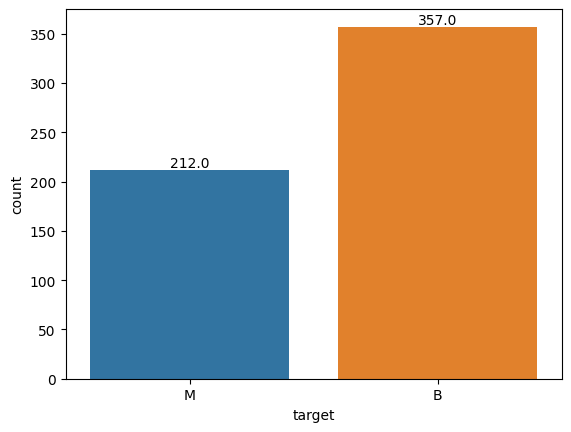

In [28]:
# Define a color palette (you can customize this list of colors)
colors = ["#1f77b4", "#ff7f0e"]

# Create the plot with different colors for each bar
ax = sns.countplot(x='target', data=df, palette=colors)

# Add count on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()

**Benign patient are more than  Malignant patient**

In [49]:
numerical_columns =['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

**Distribution of numerical columns**

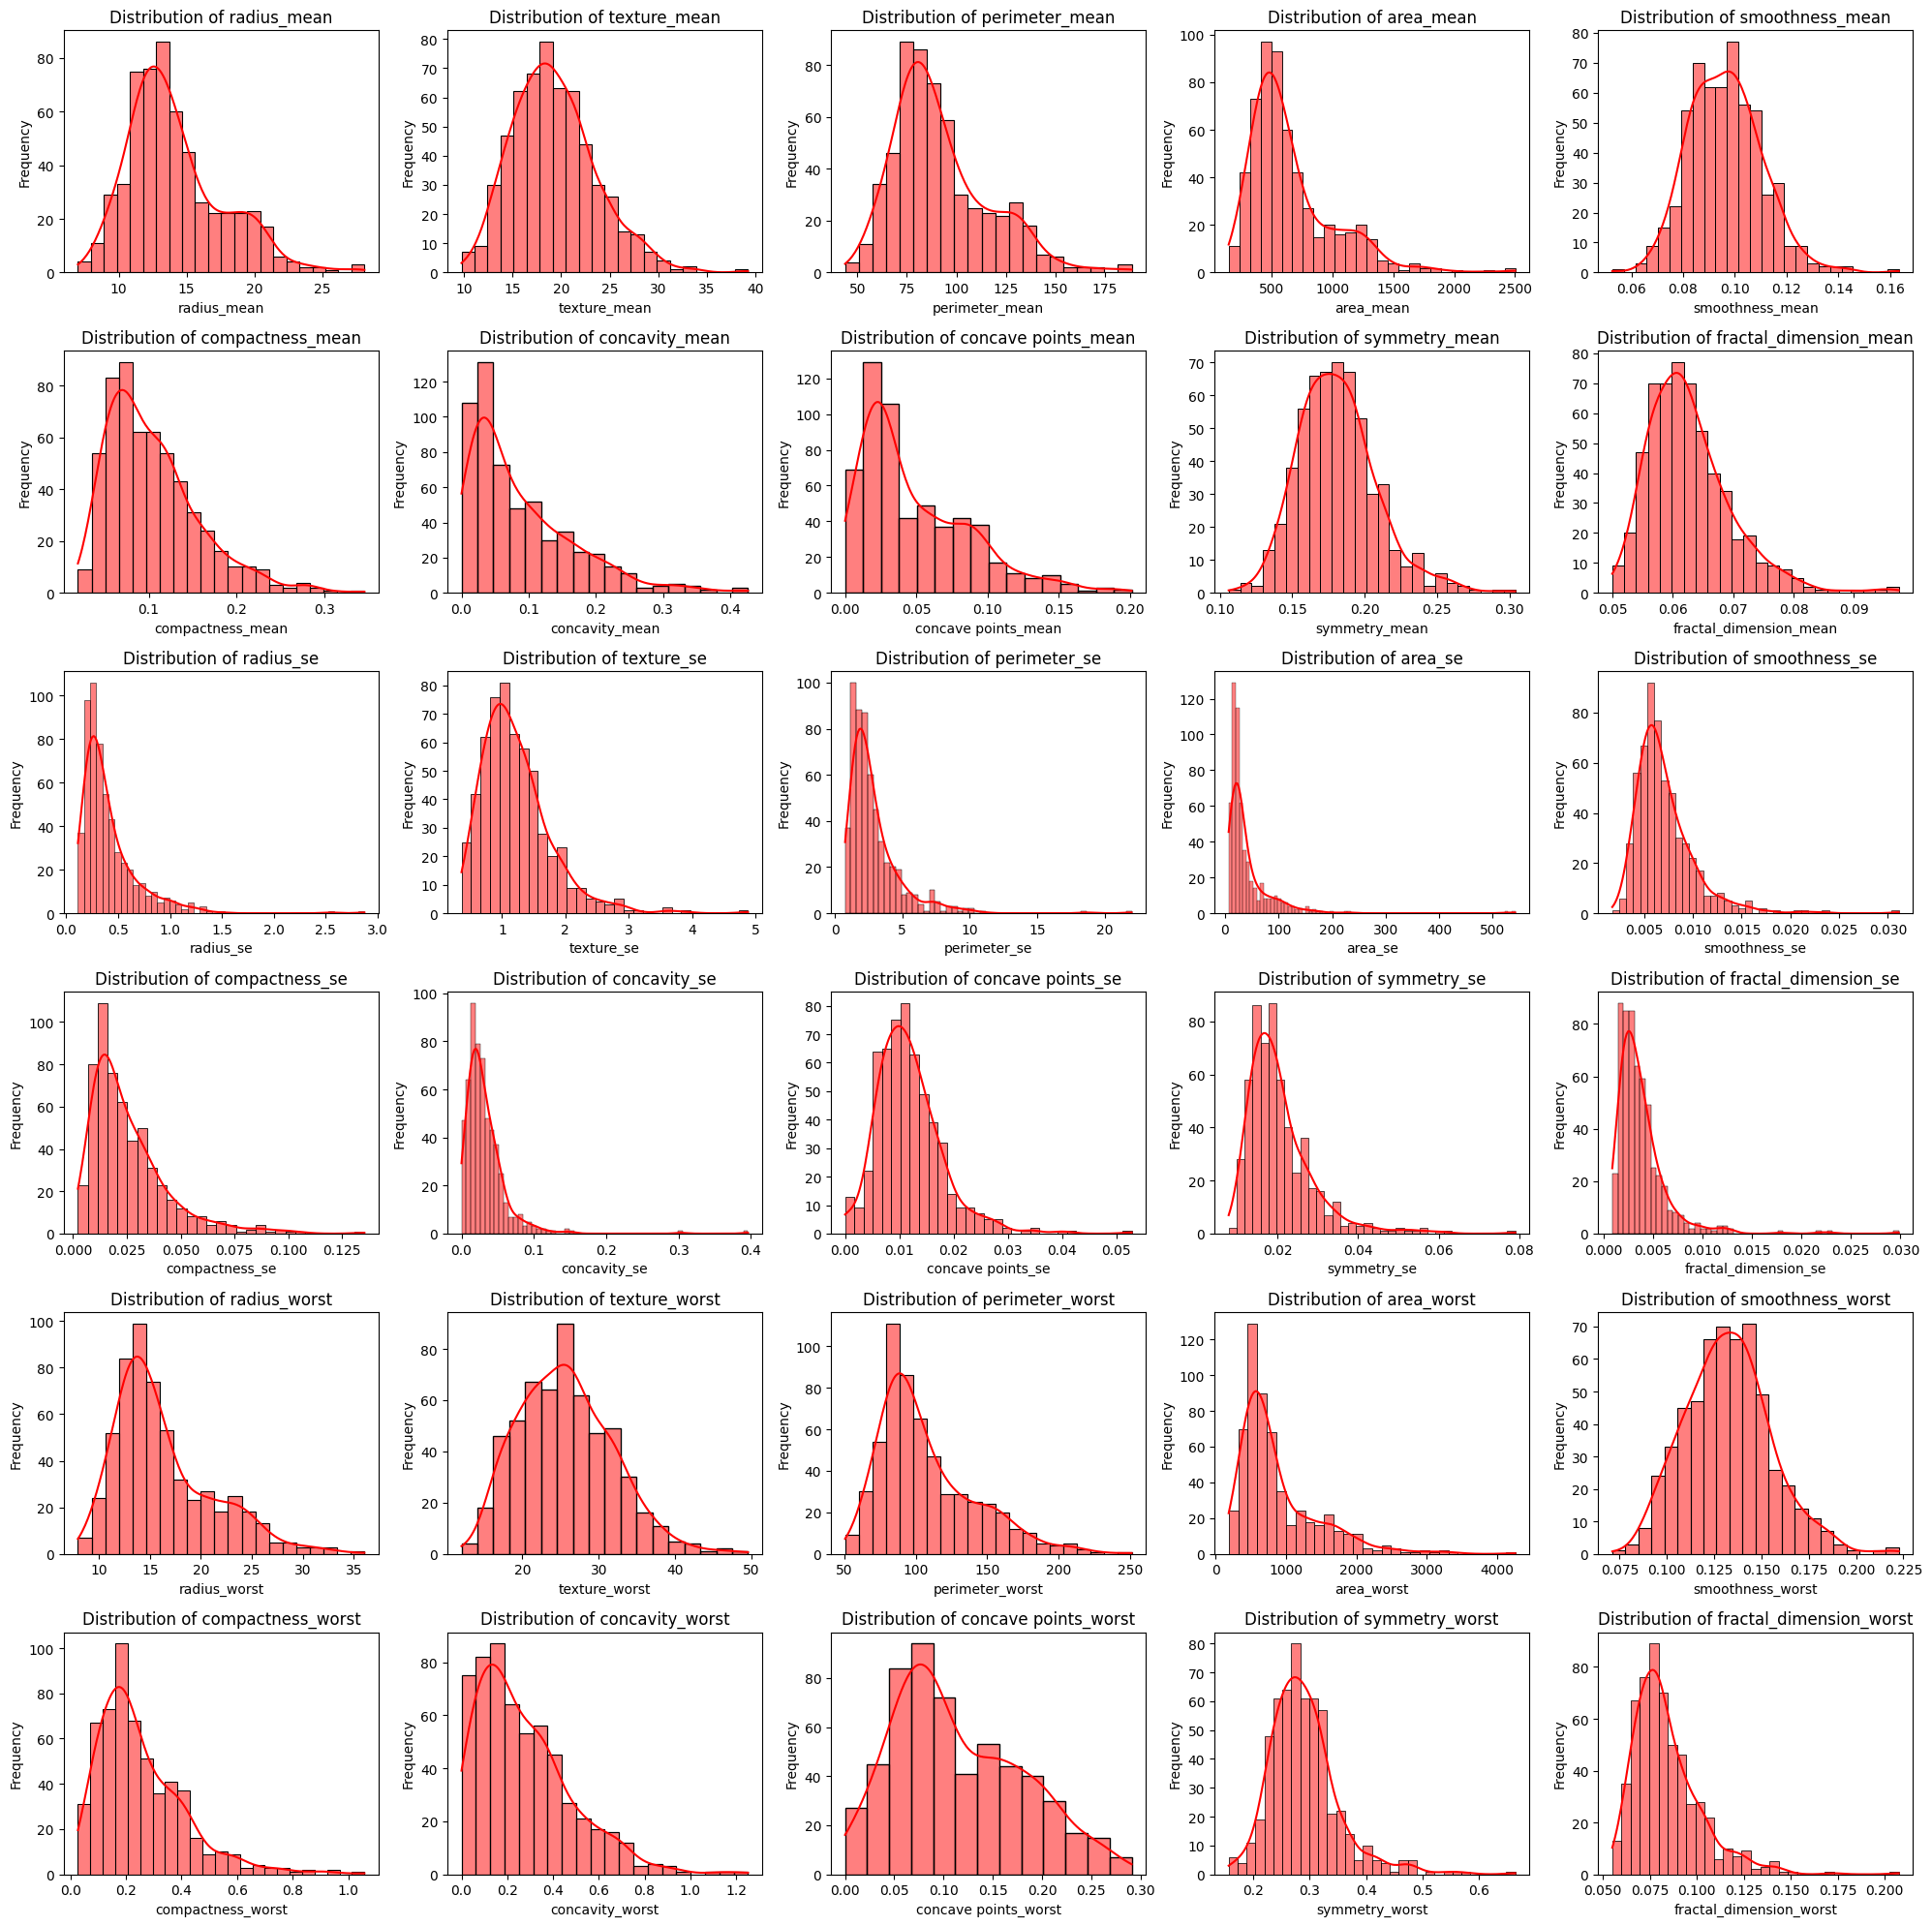

In [53]:
#Histplot
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_columns):
    plt.subplot(6, 5, i+1)
    sns.histplot(df[col],kde=True,color="red")
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**square root transformation**

**most of the data follows kind of normal distribution**

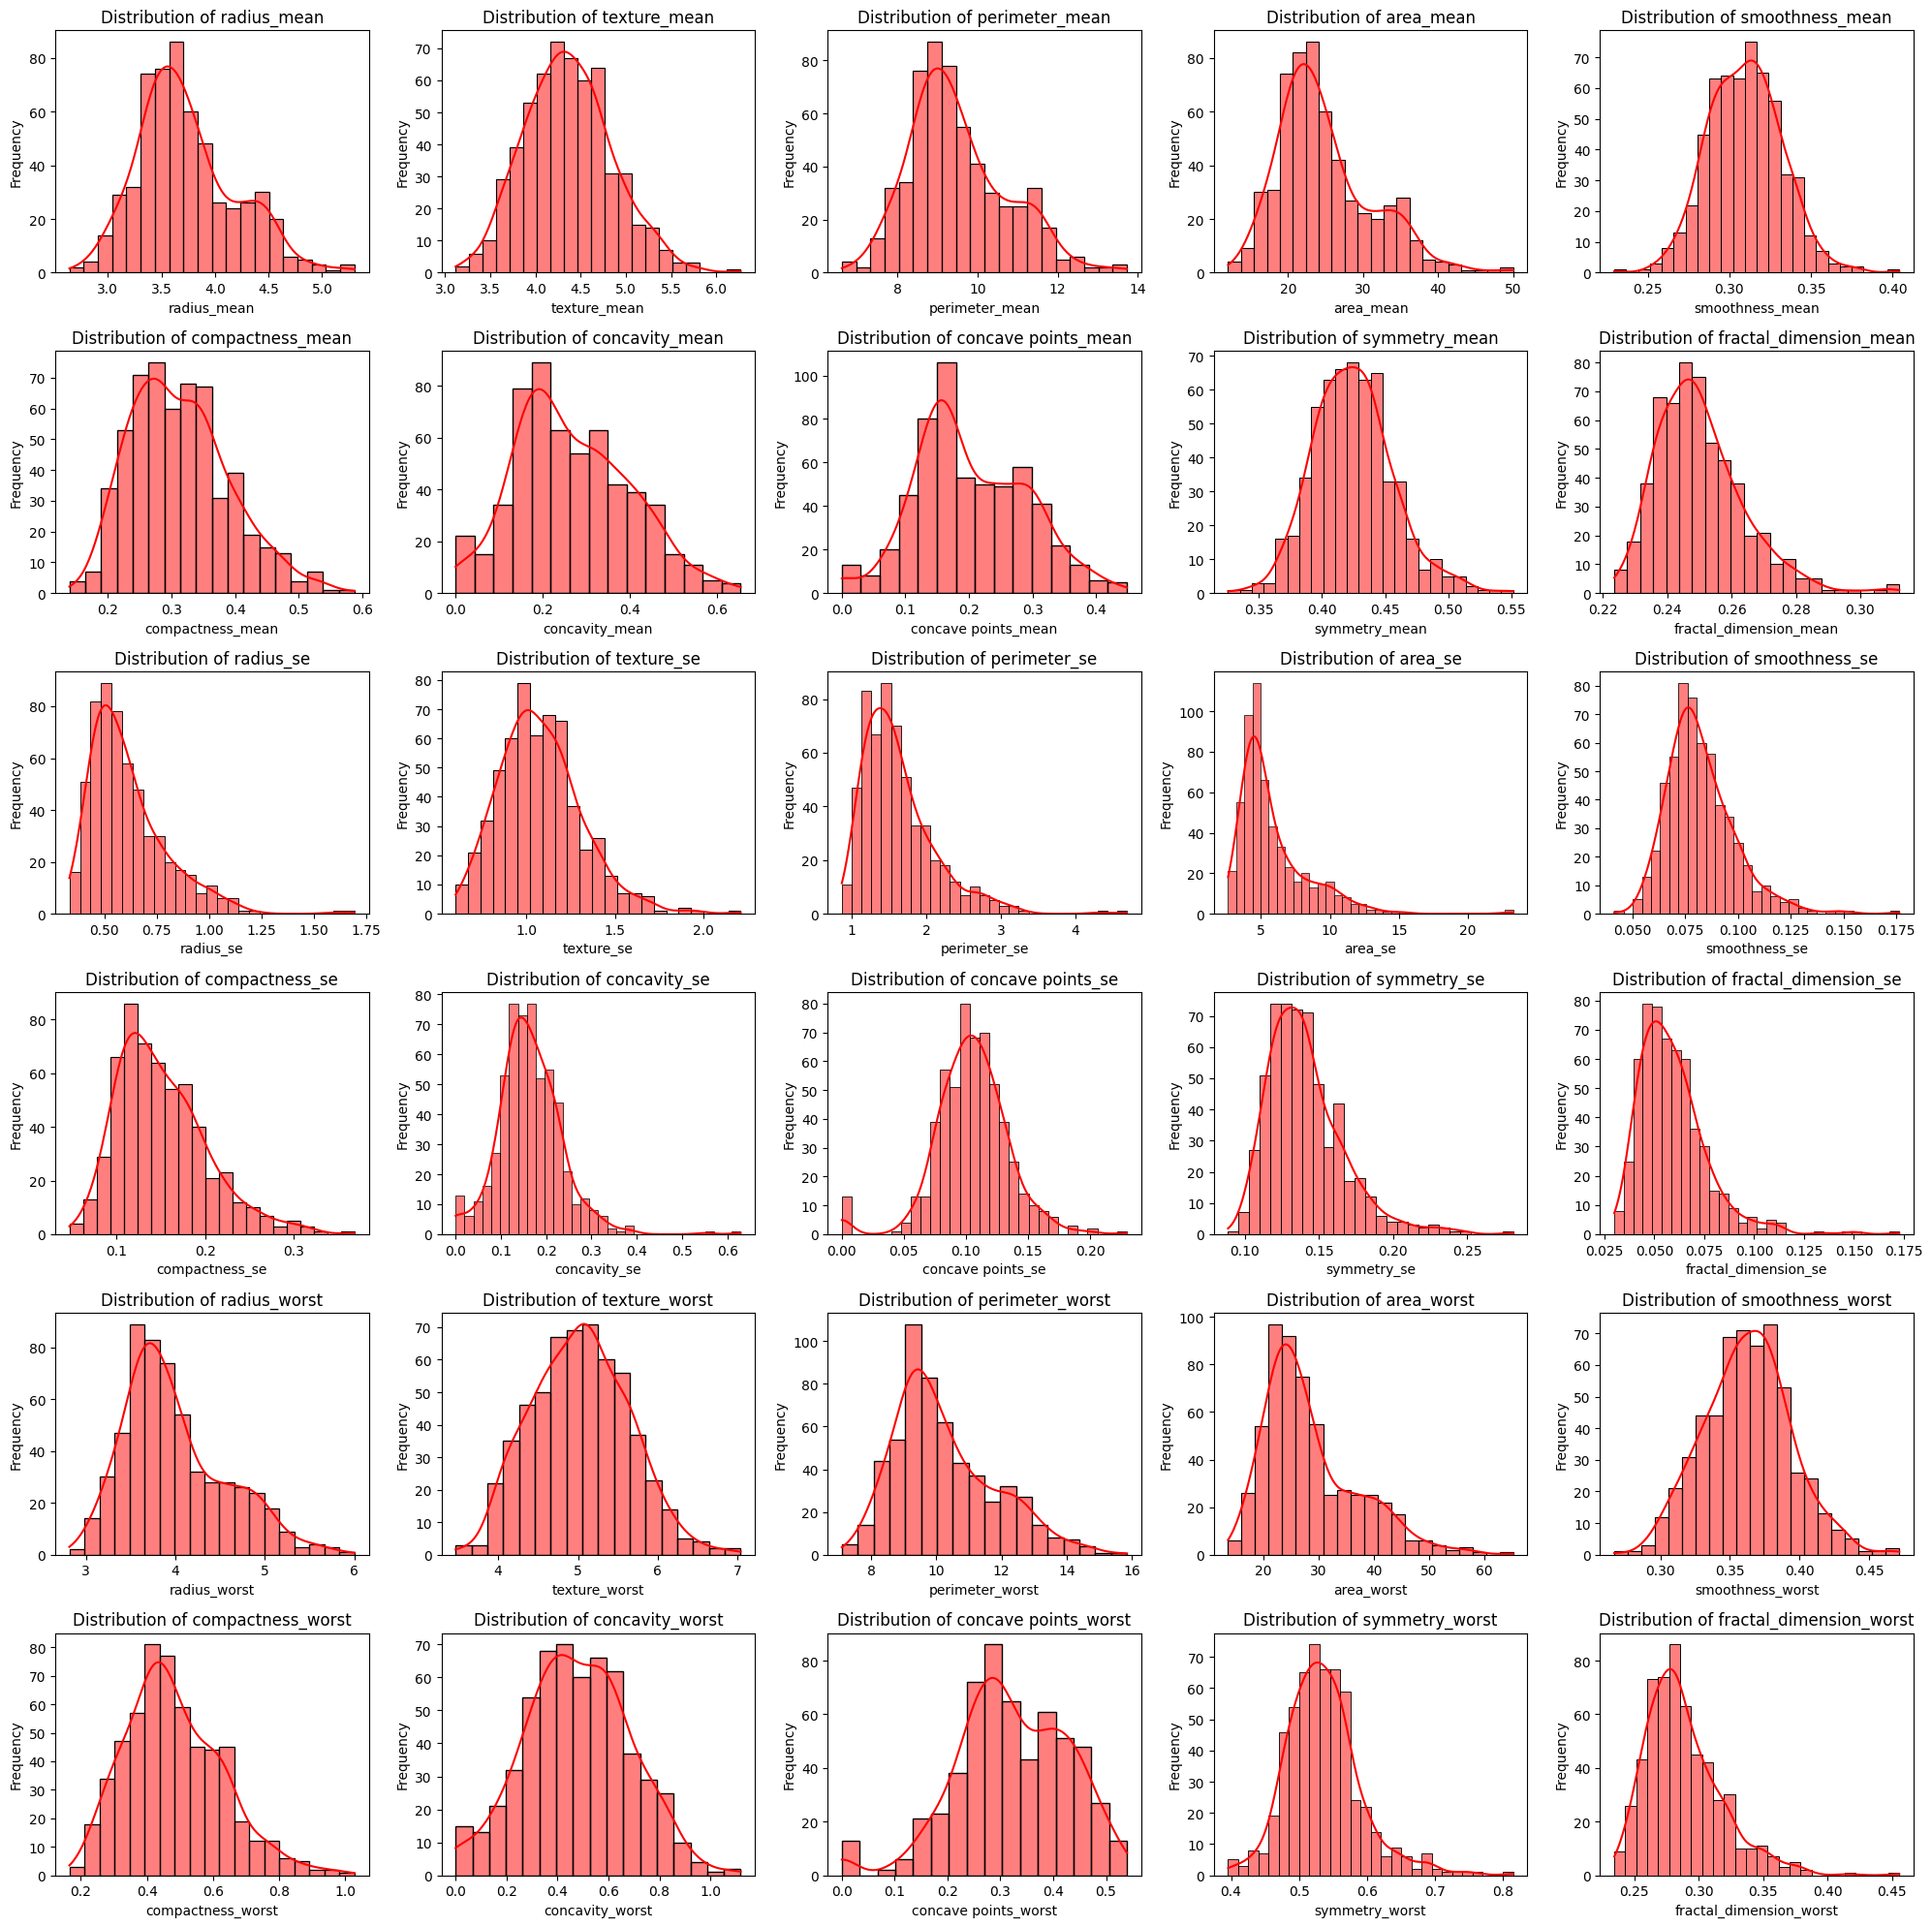

In [54]:
#Histplot
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_columns):
    plt.subplot(6, 5, i+1)
    sns.histplot(np.sqrt(df[col]),kde=True,color="red")
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Checking for outliers**

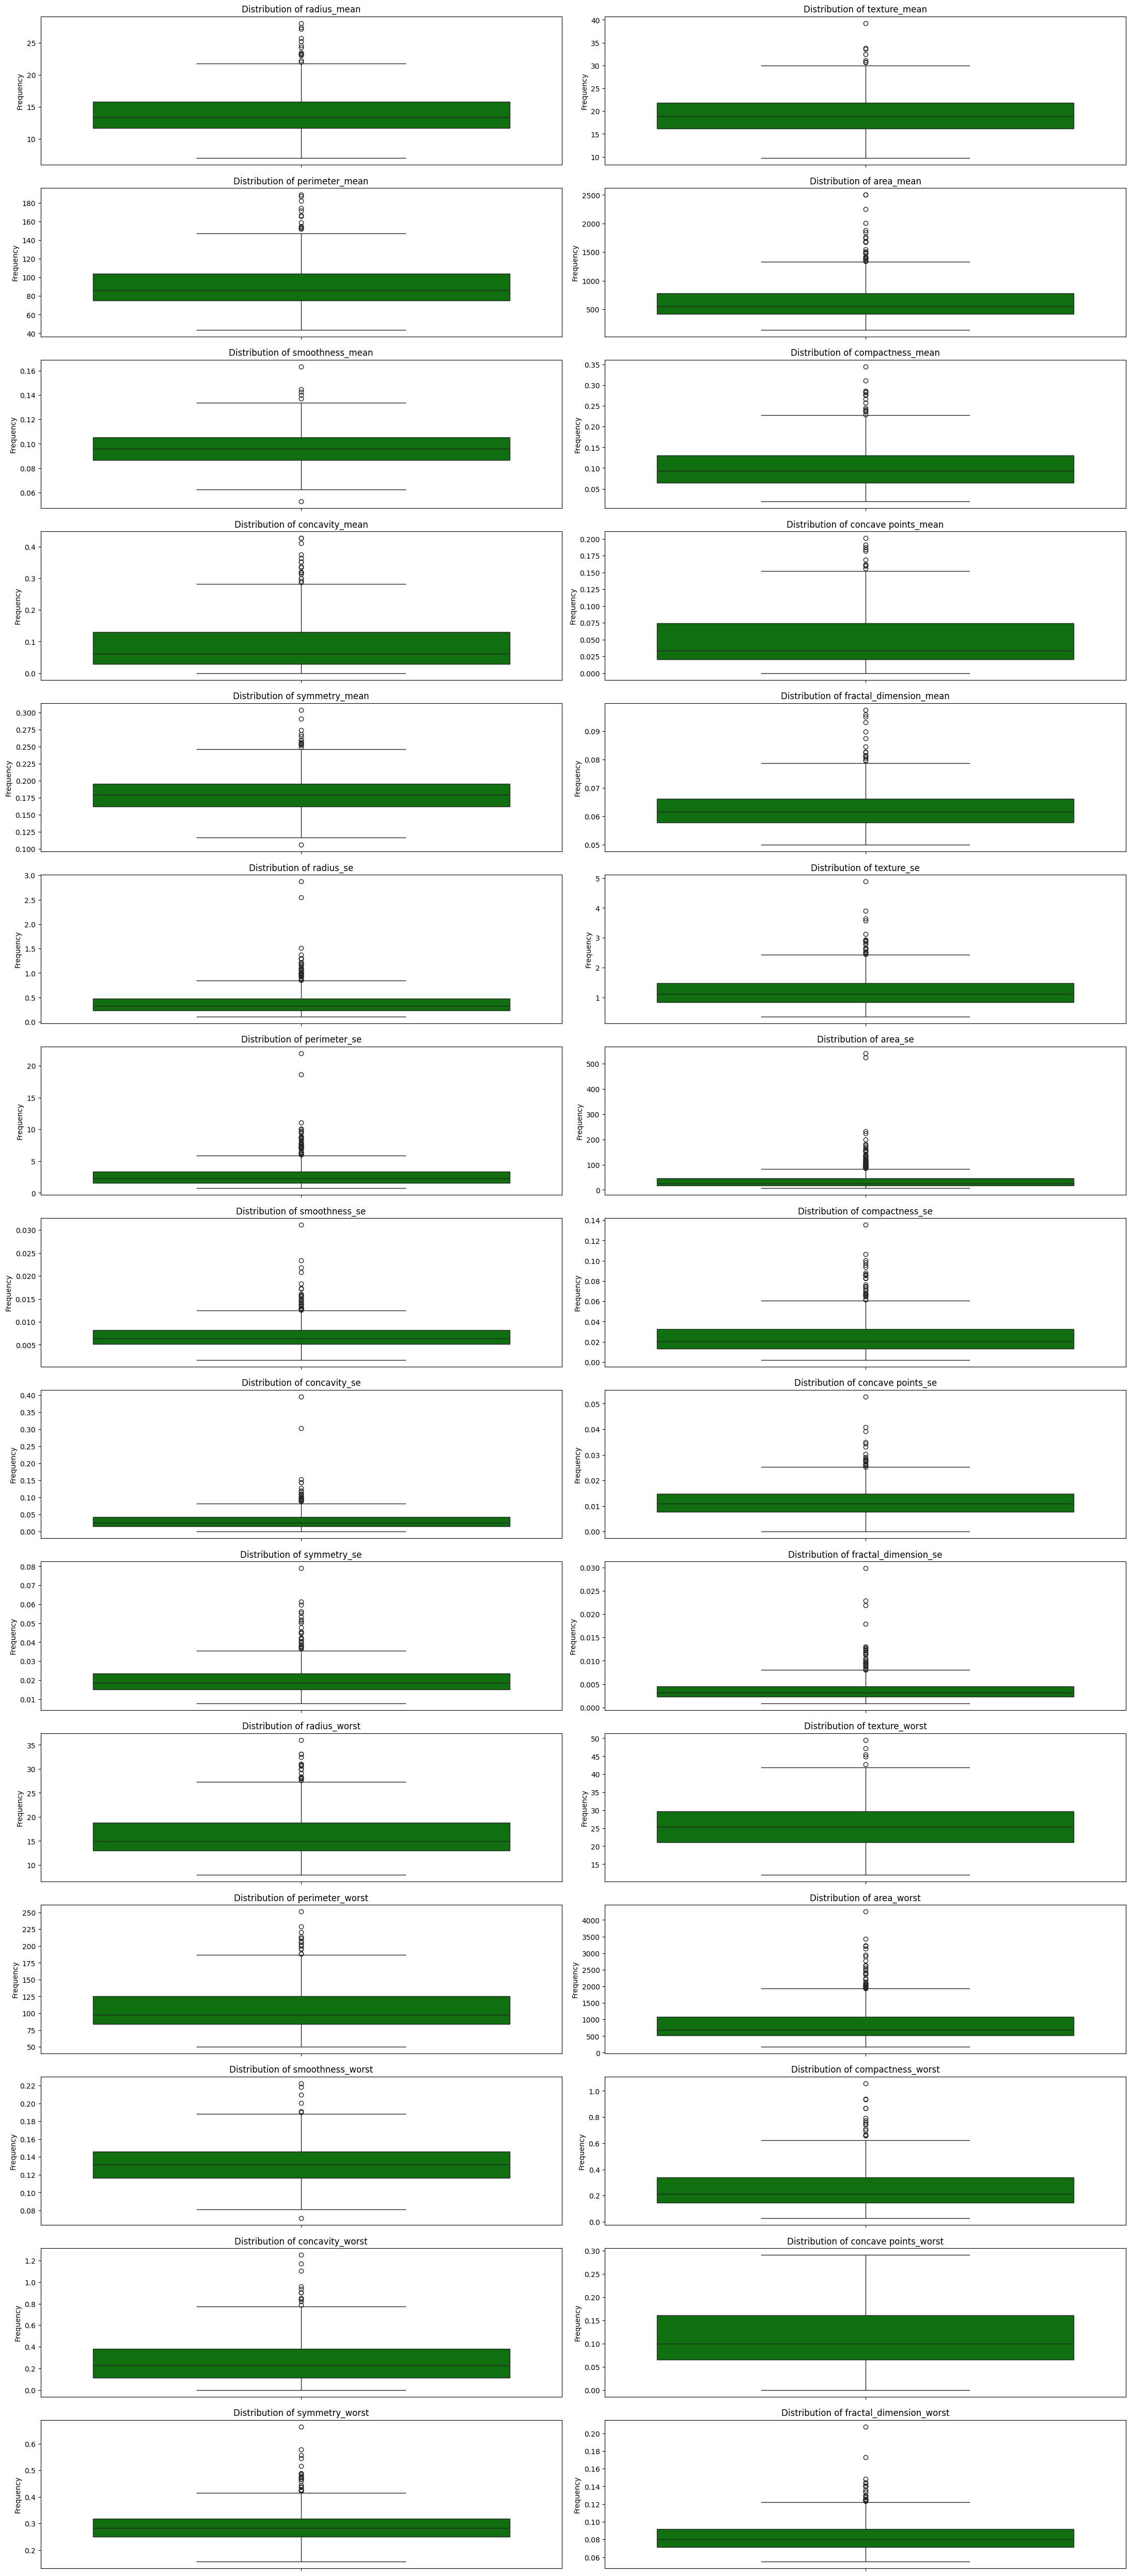

In [55]:
#Boxplot
plt.figure(figsize=(22, 50))
for i, col in enumerate(numerical_columns):
    plt.subplot(15,2, i+1)
    sns.boxplot(df[col], color='green')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**we can see high number of outliers in all the columns**

In [34]:
df['target'] = df['target'].replace({'B': 0, 'M': 1})

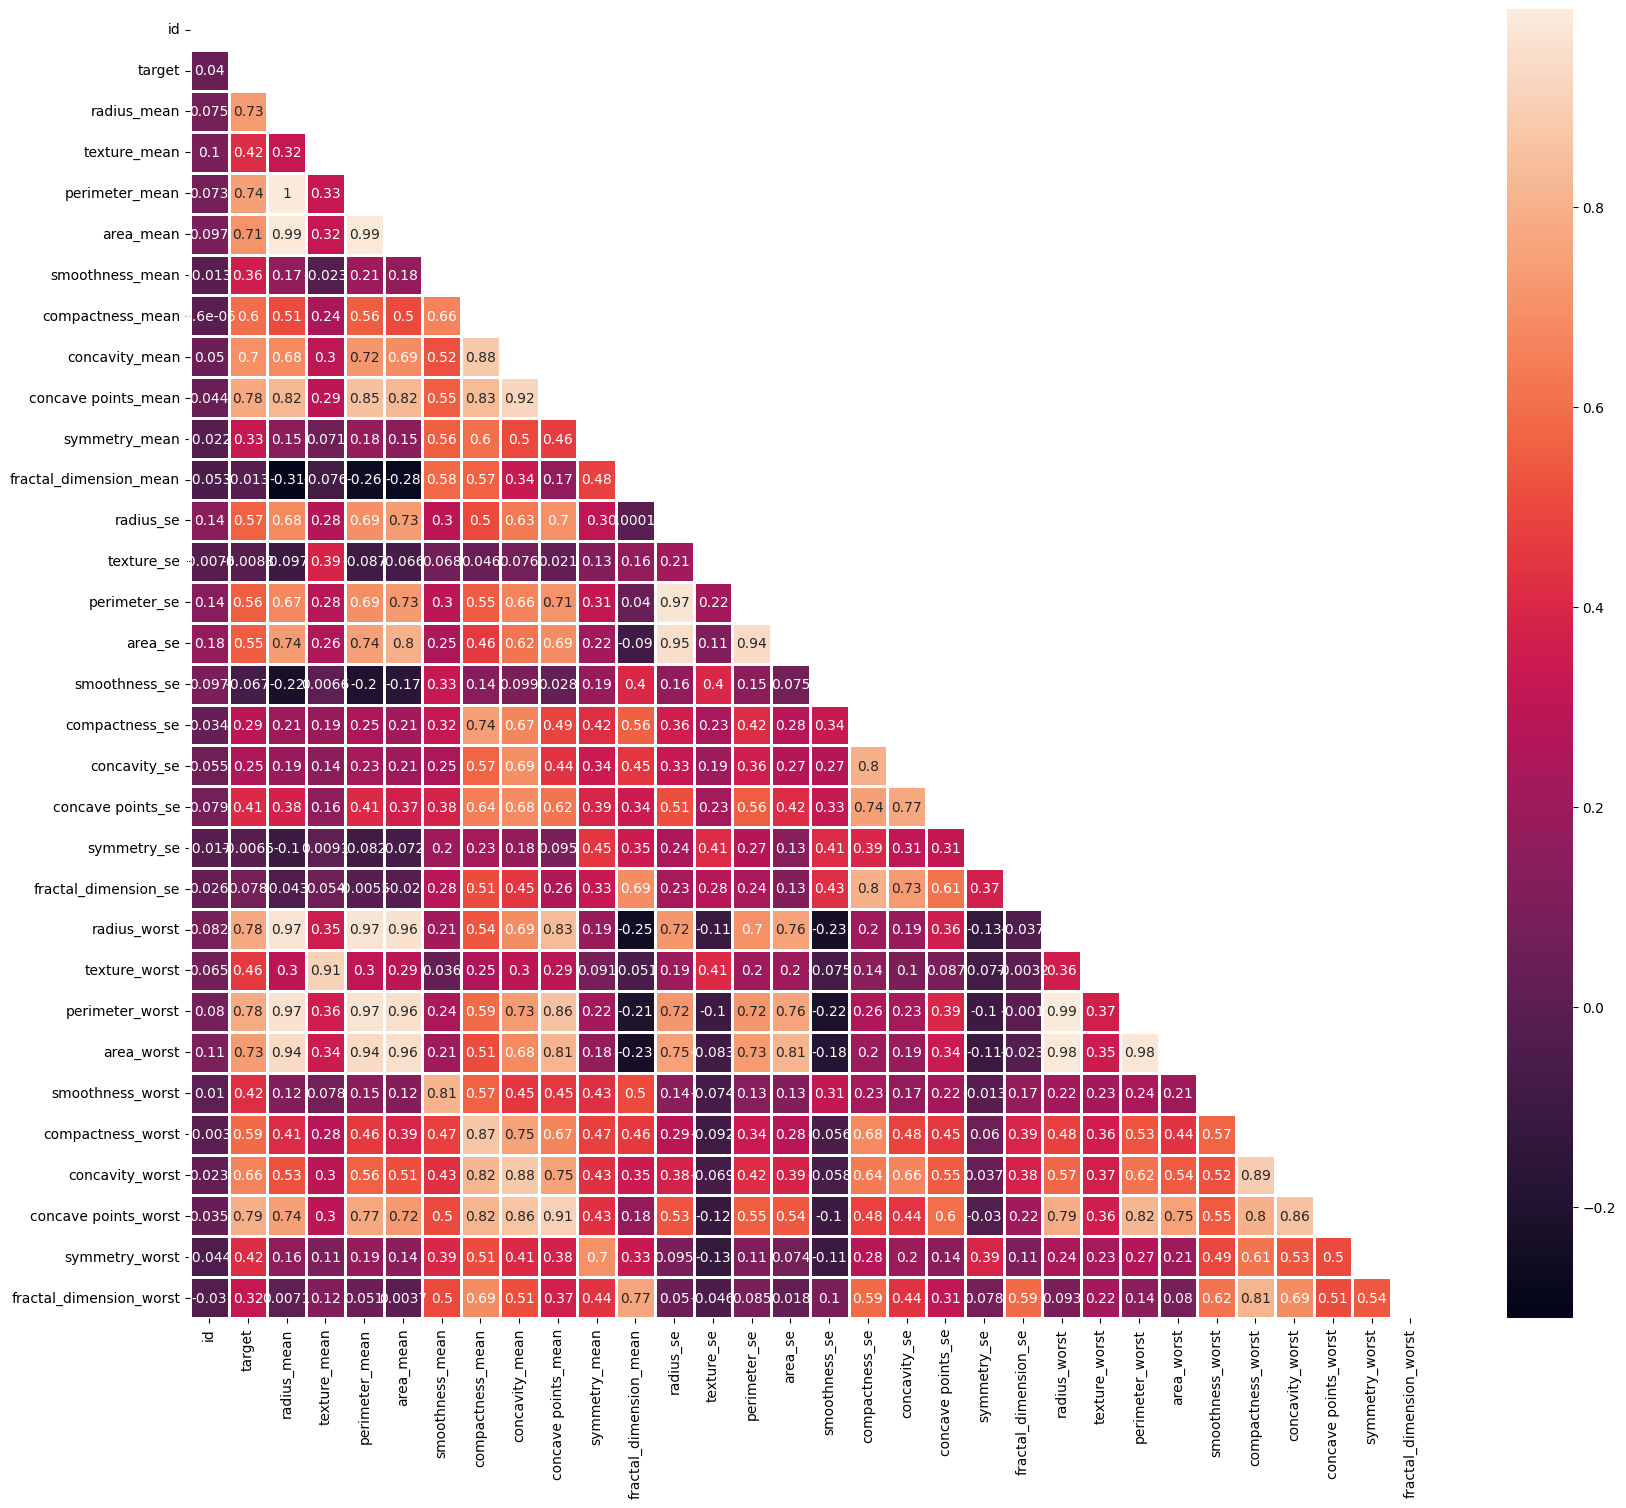

In [39]:
plt.figure(figsize=(20, 17))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix, linewidth=.8, cmap="rocket");

**'radius_mean', 'perimeter_mean', and 'area_mean etc exhibit high correlation with target values**

In [59]:
x = df.drop(["id","target"], axis = 1)
y = df.target

#**Machine Learning**

**Feature Selection**

**Choosing the most relevant numerical features involves setting a threshold value of 0.7 to select the optimal ones.**

In [61]:
def correlation(dataset,threshold):
    correlation_columns=set()
    correlation_matrix=dataset.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i,j])>threshold:
                 column_name=correlation_matrix.columns[i]
                 correlation_columns.add(column_name)
    return correlation_columns

In [71]:
c = correlation(x,0.7)
new_df=x.drop(c,axis=1)
print(c)

{'perimeter_se', 'area_mean', 'perimeter_mean', 'radius_worst', 'area_se', 'concavity_se', 'concavity_mean', 'fractal_dimension_se', 'perimeter_worst', 'concavity_worst', 'area_worst', 'smoothness_worst', 'texture_worst', 'concave points_mean', 'concave points_worst', 'concave points_se', 'radius_se', 'compactness_se', 'fractal_dimension_worst', 'compactness_worst'}


In [72]:
#Creating a new dataframe
new_df=x.drop(c,axis=1)

In [73]:
new_df.shape

(569, 10)

In [74]:
new_df.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se,symmetry_worst
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,0.9053,0.006399,0.03003,0.4601
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.7339,0.005225,0.01389,0.2750
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7869,0.006150,0.02250,0.3613
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,1.1560,0.009110,0.05963,0.6638
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7813,0.011490,0.01756,0.2364


#**Model Training and evaluation**

In [69]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score

In [77]:
print(new_df.shape)
print(y.shape)

(569, 10)
(569,)


**Train Test Split**

In [79]:
X_train,X_test,y_train,y_test = train_test_split(new_df,y,test_size=0.2,random_state=42)

In [80]:
print(X_train.shape)
print(X_test.shape)

(455, 10)
(114, 10)


In [81]:
#scaling
sc = StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

**Model selection and Training:**

Different classification models,such as

1. Logistic Regression

2. Decision Tree Classifier_

3. Random Forest Classifier_

4. XGBoost Classifier

5. Support Vector Classifier

6. K Nearest Neighbors Class

are trained and checked for performance.

In [82]:
models = {
            #"Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100),
            "Logistic Regression": LogisticRegression(multi_class='auto'),
            "Decision Tree": DecisionTreeClassifier(random_state=7),
            "Random Forest": RandomForestClassifier(random_state=7),
            "XGBoost": XGBClassifier(),
            "SVC": SVC(),
            "KNN": KNeighborsClassifier(n_neighbors=5)
         }
#------------------------------------------------------------------------------------------
metrics = []
#------------------------------------------------------------------------------------------
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    metrics.append({'Model': name, 'Train Accuracy': train_acc, 'Test Accuracy': test_acc, 'F1 Score': f1})
#------------------------------------------------------------------------------------------
metrics_df = pd.DataFrame(metrics)

In [83]:
print(metrics_df)

                 Model  Train Accuracy  Test Accuracy  F1 Score
0  Logistic Regression        0.958242       0.956140  0.956036
1        Decision Tree        1.000000       0.877193  0.878142
2        Random Forest        1.000000       0.938596  0.938122
3              XGBoost        1.000000       0.938596  0.938450
4                  SVC        0.975824       0.938596  0.938122
5                  KNN        0.969231       0.921053  0.919959


**We can see that Logistic Regression is giving higher accuracy than other algorithms**

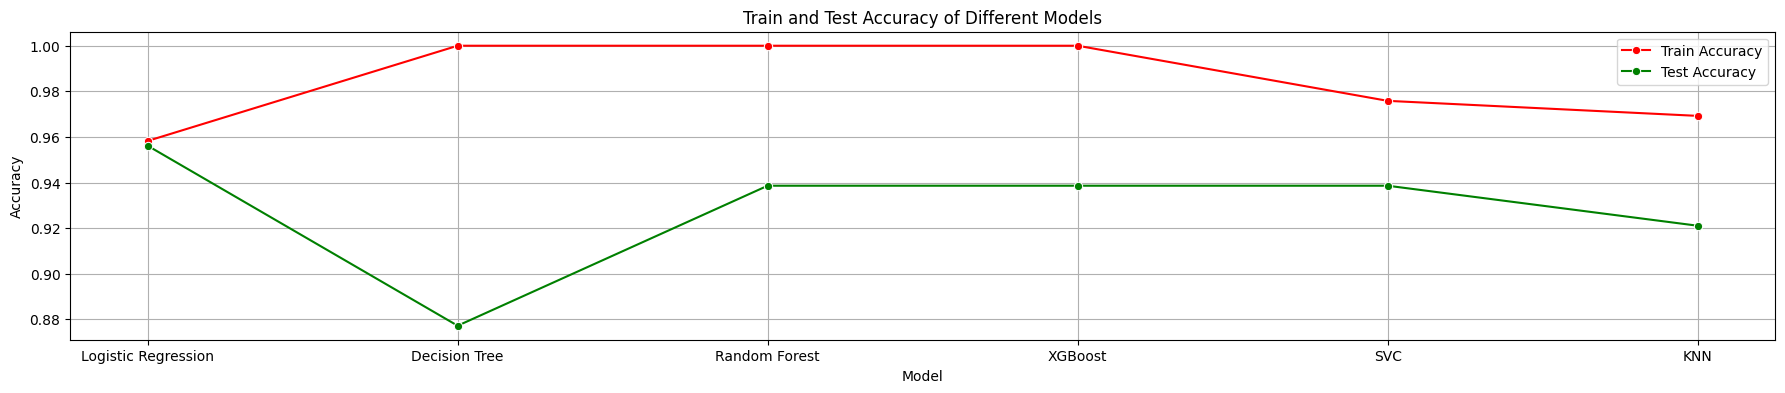

In [84]:
# Line Graph
plt.figure(figsize=(22 ,4))
sns.lineplot(data=metrics_df, x="Model", y='Train Accuracy', marker='o', color='red', label='Train Accuracy')
sns.lineplot(data=metrics_df, x="Model", y='Test Accuracy', marker='o', color='green', label='Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy of Different Models')
plt.legend()
plt.grid(True)
plt.show()

**Hyperparameter Tuning for Logistic Regression Model :**

In [85]:
param_grid = {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga'],
            'max_iter': [100, 200, 300],
             }

In [93]:
#Model
logr_model = LogisticRegression(multi_class='auto')
#GridSearchCV
grid_search = GridSearchCV(estimator=logr_model , param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [87]:
#Best parameters
best_parameters=grid_search.best_params_
print("Best hyperparameters:",best_parameters)

Best hyperparameters: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}


In [88]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

In [90]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print("Model accuracy:",accuracy)

Model accuracy: 95.6140350877193


In [91]:
#Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



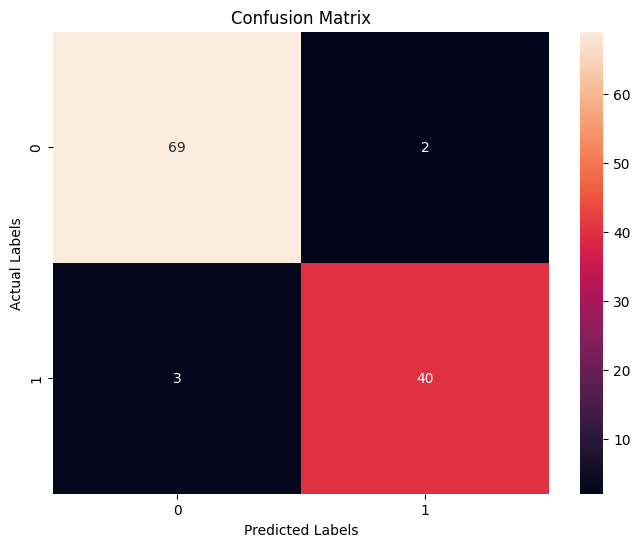

In [99]:
#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

**Now lets use all the numerical variable and using pca lets find the accuracy**

In [115]:
x.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [98]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [100]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

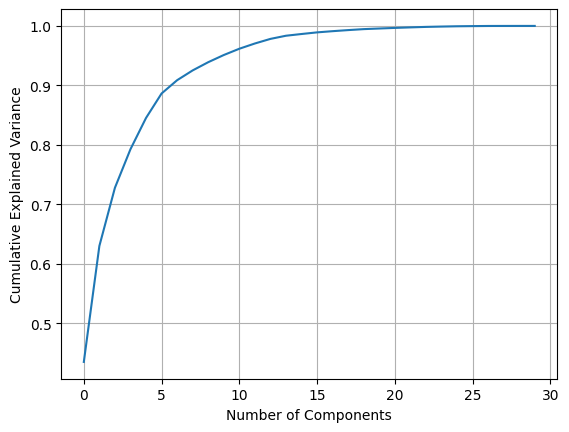

In [101]:
pca = PCA()
pca.fit(X_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

**if we take 15 components it will perform better result**

In [104]:
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [107]:
models = {
            #"Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100),
            "Logistic Regression": LogisticRegression(multi_class='auto'),
            "Decision Tree": DecisionTreeClassifier(random_state=7),
            "Random Forest": RandomForestClassifier(random_state=7),
            "XGBoost": XGBClassifier(),
            "SVC": SVC(),
            "KNN": KNeighborsClassifier(n_neighbors=5)
         }
#------------------------------------------------------------------------------------------
metrics = []
#------------------------------------------------------------------------------------------
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_train_pred = model.predict(X_train_pca)
    y_test_pred = model.predict(X_test_pca)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    metrics.append({'Model': name, 'Train Accuracy': train_acc, 'Test Accuracy': test_acc, 'F1 Score': f1})
#------------------------------------------------------------------------------------------
metrics_df = pd.DataFrame(metrics)

In [108]:
metrics_df

,Model,Train Accuracy,Test Accuracy,F1 Score
0,Logistic Regression,0.986813,0.991228,0.991207
1,Decision Tree,1.000000,0.938596,0.938732
2,Random Forest,1.000000,0.947368,0.947368
3,XGBoost,1.000000,0.973684,0.973621
4,SVC,0.989011,0.982456,0.982369
5,KNN,0.980220,0.947368,0.947368


**if we are using pca we are getting more high accuracy**

In [111]:
param_grid = {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga'],
            'max_iter': [100, 200, 300],
             }

#Model
lr = LogisticRegression(multi_class='auto')
#GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)


#Best parameters
best_parameters=grid_search.best_params_
print("Best hyperparameters:",best_parameters)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_pca)

#Accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print("Model accuracy:",accuracy)

#Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Best hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Model accuracy: 99.12280701754386
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



**we have achieved 99% accuracy**

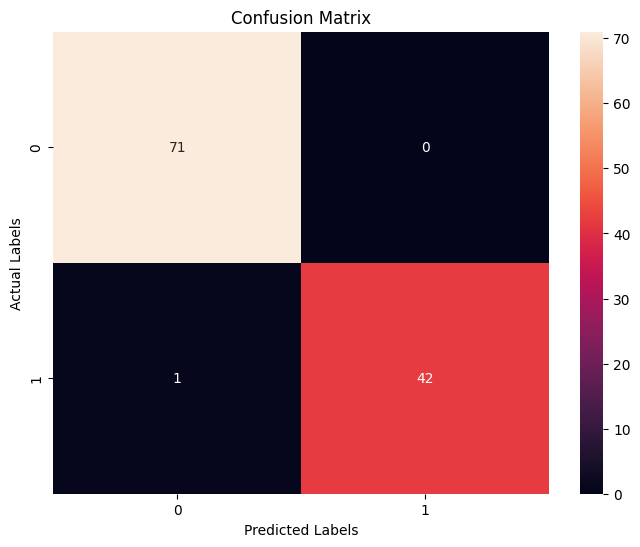

In [112]:
#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

**Prediction**

since we have used all the 30 columns so we have to give each 30 values and after transforming to pca.choosee the 15 values and give prediction

In [119]:
input_data = np.array([[17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419,
                        0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373,
                        0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019.0, 0.1622,
                        0.6656, 0.7119, 0.2654, 0.4601, 0.1189]])


In [120]:
input_data_scaled = scaler.transform(input_data)

In [121]:
input_data_pca = pca.transform(input_data_scaled)

In [122]:
predictions = best_model.predict(input_data_pca)

In [123]:
# Interpret predictions
if predictions[0] == 1:
    print("The person is predicted to have breast cancer.")
else:
    print("The person is predicted not to have breast cancer.")

The person is predicted to have breast cancer.


**web app**

In [127]:
import joblib
# Save trained model
joblib.dump(best_model, 'trained_model.pkl')

# Save scaler
joblib.dump(scaler, 'scaler.pkl')

# Save PCA
joblib.dump(pca, 'pca.pkl')

['pca.pkl']

In [132]:
import streamlit as st
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import joblib

# Load trained model and preprocessing objects
model = joblib.load('trained_model.pkl')
scaler = joblib.load('scaler.pkl')
pca = joblib.load('pca.pkl')

# Define input interface
st.title('Breast Cancer Prediction')
st.write('Please enter the values for the following features:')

# Create input fields for each feature
input_features = []
for feature in ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                'smoothness_mean', 'compactness_mean', 'concavity_mean',
                'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
                'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
                'fractal_dimension_se', 'radius_worst', 'texture_worst',
                'perimeter_worst', 'area_worst', 'smoothness_worst',
                'compactness_worst', 'concavity_worst', 'concave points_worst',
                'symmetry_worst', 'fractal_dimension_worst']:
    value = st.number_input(label=feature, format='%f')
    input_features.append(value)

# Make predictions
input_data = np.array(input_features).reshape(1, -1)
input_data_scaled = scaler.transform(input_data)
input_data_pca = pca.transform(input_data_scaled)
prediction = model.predict(input_data_pca)

# Display results
st.write('Prediction:')

if prediction[0] == 1:
    st.write('The person is predicted to have breast cancer.')
else:
    st.write('The person is predicted not to have breast cancer.')


2024-04-27 17:01:16.177 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [133]:
!wget -q -O - ipv4.icanhazip.com

35.236.153.218


In [134]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.236.153.218:8501

npx: installed 22 in 4.427s
your url is: https://silly-pots-lose.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X d